In [22]:

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import lightgbm as lgb
import xgboost as xgb
# sklearn
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler

import sklearn.metrics

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set()

from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

import operator as op 
from itertools import combinations

from numpy import mean
from numpy import std

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] =100
plt.rcParams['agg.path.chunksize'] = 10000
pd.set_option('display.max_columns', None)

In [23]:
df = pd.read_csv("creditcardcsvpresent_clean.csv")
df.head()

Merchant_id  Average Amount/transaction/day  Transaction_amount  \
0   3160040998                           100.0              3000.0   
1   3160040998                           100.0              4300.0   
2   3160041896                           185.5              4823.0   
3   3160141996                           185.5              5008.5   
4   3160241992                           500.0             26000.0   

   is_declined  Total Number of declines/day  isForeignTransaction  \
0            0                             5                     1   
1            0                             5                     1   
2            1                             5                     0   
3            1                             8                     0   
4            0                             0                     1   

   isHighRiskCountry  Daily_chargeback_avg_amt  6_month_avg_chbk_amt  \
0                  1                         0                   0.0   
1                  1                         0                   0.0   
2                  0                         0                   0.0   
3                  0                         0                   0.0   
4                  1                       800                 677.2   

   6-month_chbk_freq  isFraudulent  
0                  0             1  
1                  0             1  
2                  0             1  
3                  0             1  
4                  6             1

In [24]:
df.shape

(3075, 11)

In [25]:
X, y = df.iloc[:, :30], df["isFraudulent"]
X.head()

Merchant_id  Average Amount/transaction/day  Transaction_amount  \
0   3160040998                           100.0              3000.0   
1   3160040998                           100.0              4300.0   
2   3160041896                           185.5              4823.0   
3   3160141996                           185.5              5008.5   
4   3160241992                           500.0             26000.0   

   is_declined  Total Number of declines/day  isForeignTransaction  \
0            0                             5                     1   
1            0                             5                     1   
2            1                             5                     0   
3            1                             8                     0   
4            0                             0                     1   

   isHighRiskCountry  Daily_chargeback_avg_amt  6_month_avg_chbk_amt  \
0                  1                         0                   0.0   
1                  1                         0                   0.0   
2                  0                         0                   0.0   
3                  0                         0                   0.0   
4                  1                       800                 677.2   

   6-month_chbk_freq  isFraudulent  
0                  0             1  
1                  0             1  
2                  0             1  
3                  0             1  
4                  6             1

In [26]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: isFraudulent, dtype: int64

In [27]:
#y_train = train_df['Class'].values
#x_train = train_df.drop(['Class'], axis='columns')
#x_train = x_train.values
seed = 42
from numpy import bincount


In [28]:
from imblearn.over_sampling import SMOTE
neg, pos  = bincount(y)
print('Original balance: '+str(neg)+' non-fraud, '+str(pos)+' fraud')
oversample = SMOTE(sampling_strategy=0.9999)
(X, y) = oversample.fit_resample(X, y)
neg, pos = bincount(y)
print('New balance: '+str(neg)+' non-fraud, '+str(pos)+' fraud')

Original balance: 2627 non-fraud, 448 fraud
New balance: 2627 non-fraud, 2626 fraud


In [13]:
neg, pos  = bincount(y)
print('Original balance: '+str(neg)+' non-fraud, '+str(pos)+' fraud')
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1.0)
X, y = rus.fit_resample(X, y)
neg, pos = bincount(y)
print('New balance: '+str(neg)+' non-fraud, '+str(pos)+' fraud')

Original balance: 2627 non-fraud, 2626 fraud
New balance: 2626 non-fraud, 2626 fraud


In [29]:
X.shape


(5253, 11)

In [77]:
#COMPARISON OF PERFORMANCE USING ACCURACY

>KNN 0.67047 (0.01841)
>CART 1.00000 (0.00000)
>SVM 0.53620 (0.01893)
>BAYES 0.70004 (0.01749)
>RF 1.00000 (0.00000)
>STACK 1.00000 (0.00000)


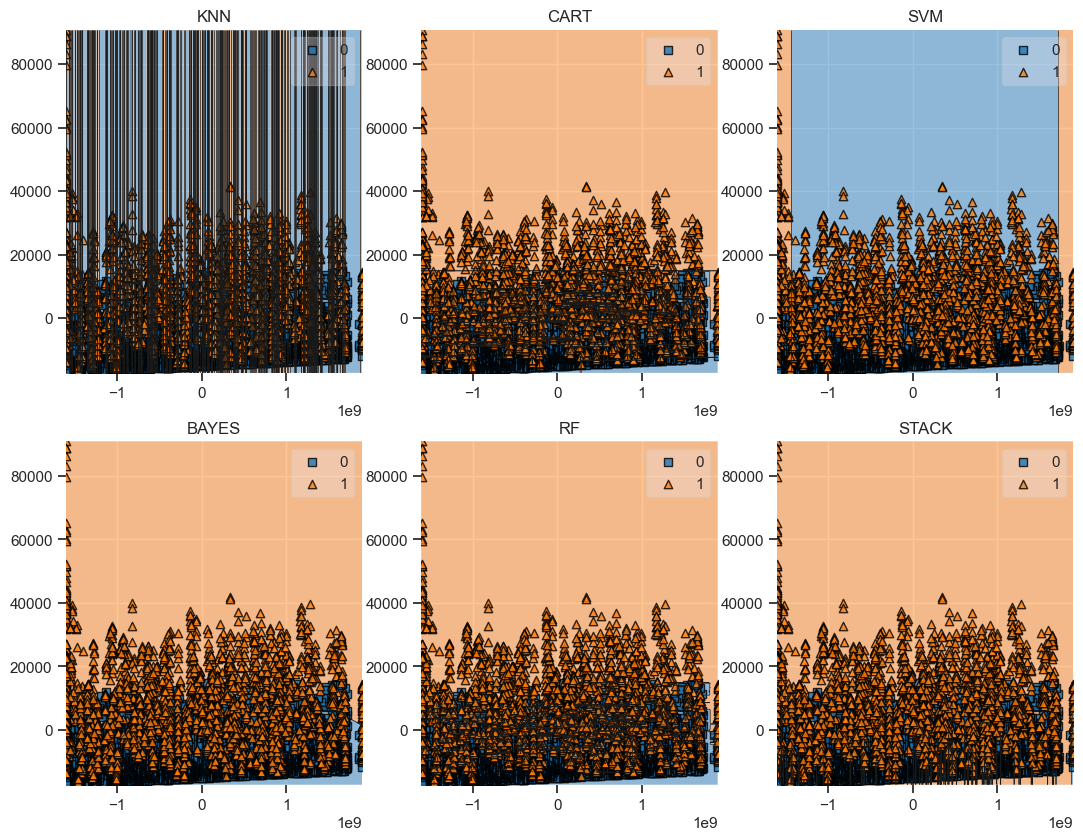

In [30]:
from matplotlib import gridspec
import itertools
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
# get a stacking ensemble of models
def get_stacking():
	# define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    level0.append(('RF', RandomForestClassifier(random_state=1)))
	# define meta learner model
    level1 = LogisticRegression()
	# define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['RF'] = RandomForestClassifier(random_state=1)
    models['stacking'] = get_stacking()
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

knn = KNeighborsClassifier()
cart = DecisionTreeClassifier()
svm = SVC()
bayes = GaussianNB()
RF = RandomForestClassifier(random_state=1)
stacking = get_stacking()
c_list = [knn, cart, svm, bayes, RF, stacking]
label = ['KNN', 'CART', 'SVM', 'BAYES', 'RF', 'STACK']

fig = plt.figure(figsize=(13,10))
gs = gridspec.GridSpec(2,3)
grid = itertools.product([0,1], [0,1,2])
models = get_models()
# evaluate the models and store results
results, names = list(), list()
clf_mean, clf_std = list(), list()
pca = PCA(n_components = 2)
X1 = pca.fit_transform(X)
y1=y.to_numpy(copy=False)
s = 1
for model, name, grd in zip(c_list, label, grid):
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    clf_mean.append(mean(scores))
    clf_std.append(std(scores))
    print('>%s %.5f (%.5f)' % (name, mean(scores), std(scores)))
    
    model.fit(X1, y1)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig= plot_decision_regions(X=X1, y=y1, clf=model)
    plt.title(name)
    
plt.show()

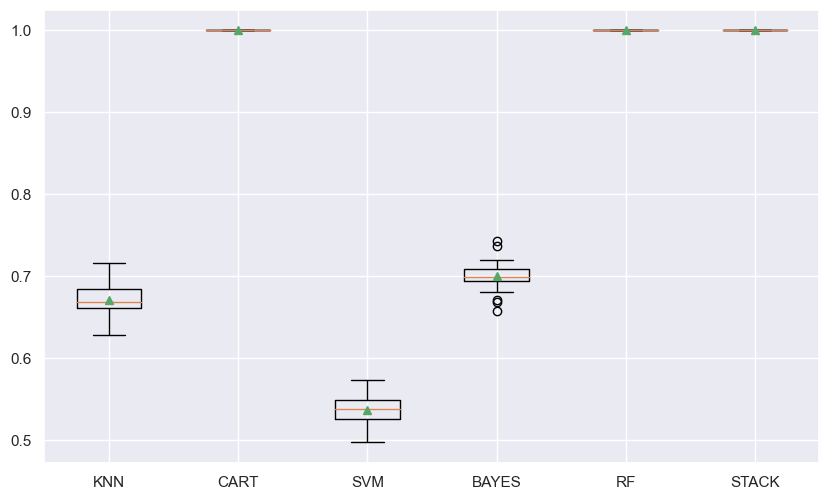

In [31]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show()


In [78]:
#COMPARISON OF PERFORMANCE USING PRECISION

>KNN 0.66424 (0.01772)
>CART 1.00000 (0.00000)
>SVM 0.57414 (0.03828)
>BAYES 0.77957 (0.02216)
>RF 1.00000 (0.00000)
>STACK 1.00000 (0.00000)


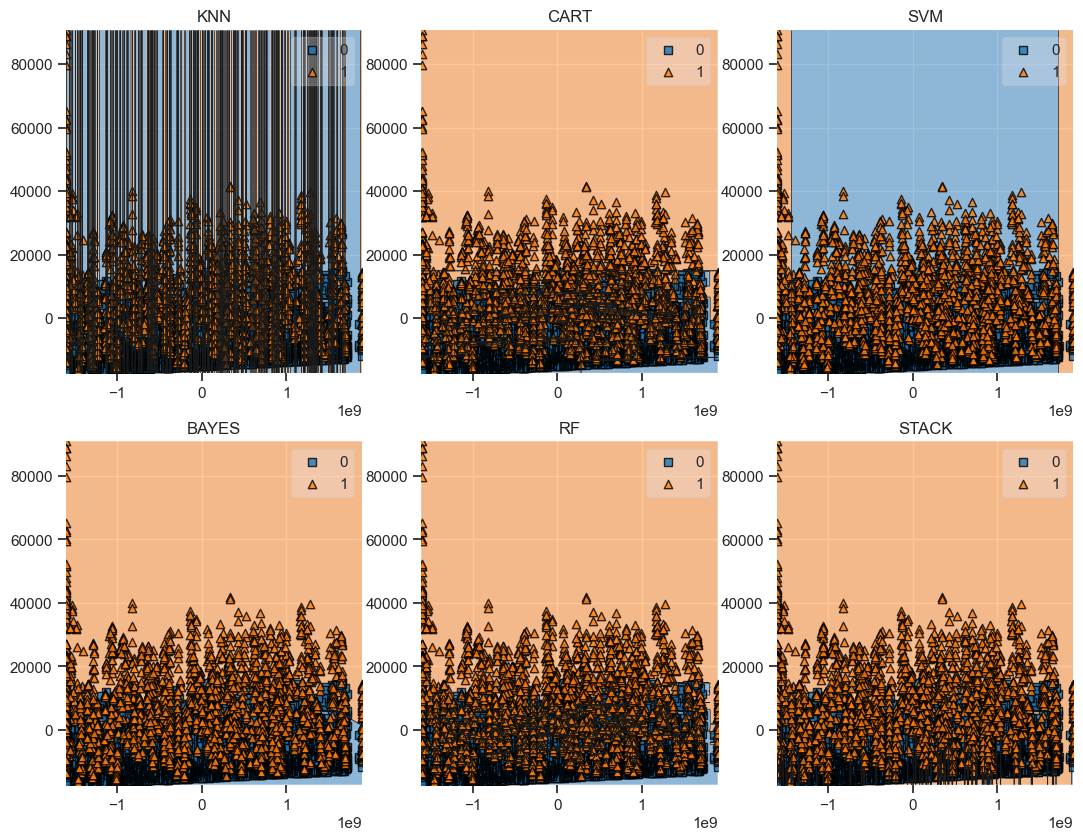

In [32]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
	return scores

knn = KNeighborsClassifier()
cart = DecisionTreeClassifier()
svm = SVC()
bayes = GaussianNB()
RF = RandomForestClassifier(random_state=1)
stacking = get_stacking()
c_list = [knn, cart, svm, bayes, RF, stacking]
label = ['KNN', 'CART', 'SVM', 'BAYES', 'RF', 'STACK']

fig = plt.figure(figsize=(13,10))
gs = gridspec.GridSpec(2,3)
grid = itertools.product([0,1], [0,1,2])
models = get_models()
# evaluate the models and store results
results, names = list(), list()
clf_mean, clf_std = list(), list()
pca = PCA(n_components = 2)
X1 = pca.fit_transform(X)
y1=y.to_numpy(copy=False)
s = 1
for model, name, grd in zip(c_list, label, grid):
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    clf_mean.append(mean(scores))
    clf_std.append(std(scores))
    print('>%s %.5f (%.5f)' % (name, mean(scores), std(scores)))
    
    model.fit(X1, y1)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig= plot_decision_regions(X=X1, y=y1, clf=model)
    plt.title(name)
    
plt.show()

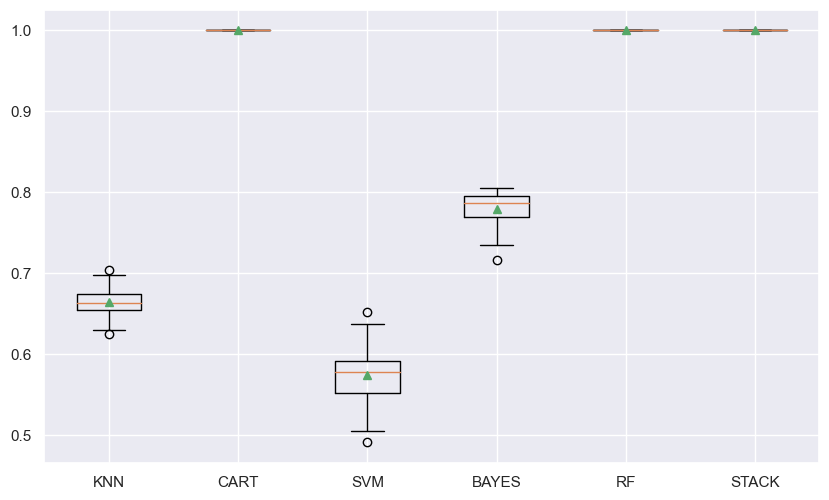

In [33]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [81]:
#COMPARISON OF PERFORMANCE USING RECALL

>KNN 0.68937 (0.02788)
>CART 1.00000 (0.00000)
>SVM 0.27774 (0.03602)
>BAYES 0.55800 (0.03204)
>RF 1.00000 (0.00000)
>STACK 1.00000 (0.00000)


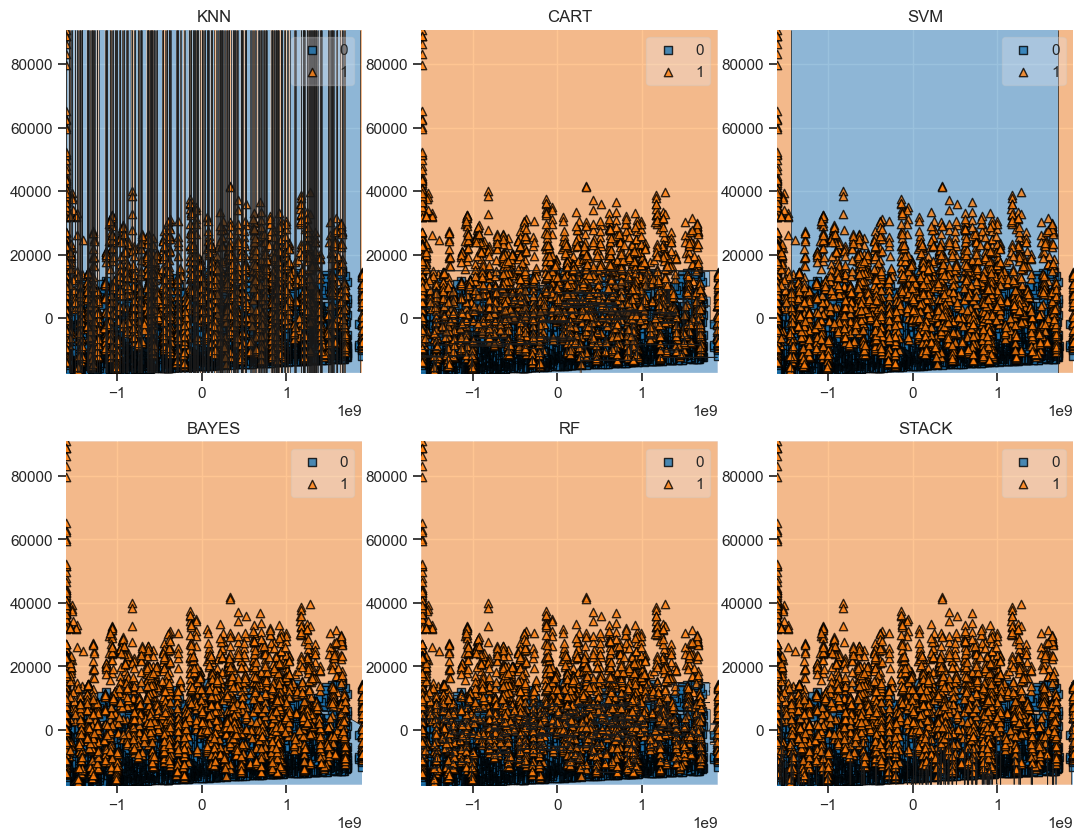

In [34]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
	return scores

knn = KNeighborsClassifier()
cart = DecisionTreeClassifier()
svm = SVC()
bayes = GaussianNB()
RF = RandomForestClassifier(random_state=1)
stacking = get_stacking()
c_list = [knn, cart, svm, bayes, RF, stacking]
label = ['KNN', 'CART', 'SVM', 'BAYES', 'RF', 'STACK']

fig = plt.figure(figsize=(13,10))
gs = gridspec.GridSpec(2,3)
grid = itertools.product([0,1], [0,1,2])
models = get_models()
# evaluate the models and store results
results, names = list(), list()
clf_mean, clf_std = list(), list()
pca = PCA(n_components = 2)
X1 = pca.fit_transform(X)
y1=y.to_numpy(copy=False)
s = 1
for model, name, grd in zip(c_list, label, grid):
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    clf_mean.append(mean(scores))
    clf_std.append(std(scores))
    print('>%s %.5f (%.5f)' % (name, mean(scores), std(scores)))
    
    model.fit(X1, y1)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig= plot_decision_regions(X=X1, y=y1, clf=model)
    plt.title(name)
    
plt.show()

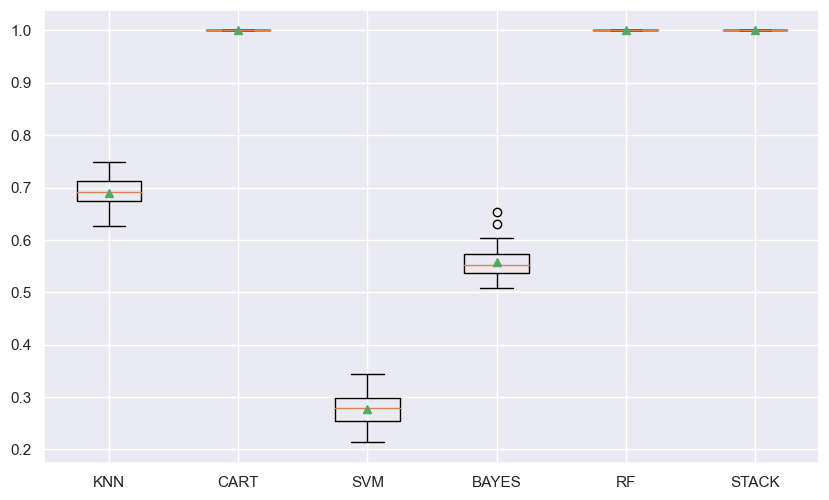

In [35]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [80]:
#COMPARISON OF PERFORMANCE USING F1 SCORE

>KNN 0.67638 (0.02011)
>CART 1.00000 (0.00000)
>SVM 0.37351 (0.03811)
>BAYES 0.64994 (0.02463)
>RF 1.00000 (0.00000)
>STACK 1.00000 (0.00000)


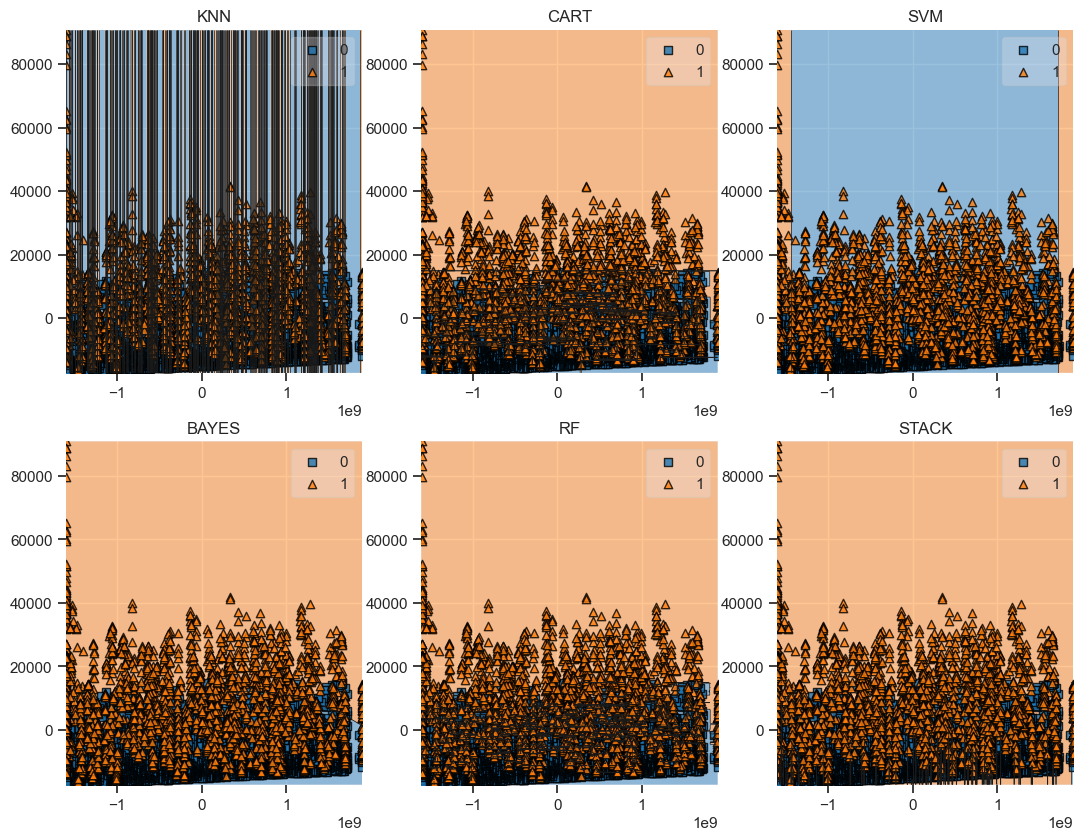

In [36]:
# evaluate a give model using cross-validation
#def evaluate_model(model, X, y):
#	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#	scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
#	return scores

#models = get_models()
# evaluate the models and store results
#results, names = list(), list()
#for name, model in models.items():
#	scores = evaluate_model(model, X, y)
#	results.append(scores)
#	names.append(name)
#	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

#plt.boxplot(results, labels=names, showmeans=True)
#plt.show()
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
	return scores

knn = KNeighborsClassifier()
cart = DecisionTreeClassifier()
svm = SVC()
bayes = GaussianNB()
RF = RandomForestClassifier(random_state=1)
stacking = get_stacking()
c_list = [knn, cart, svm, bayes, RF, stacking]
label = ['KNN', 'CART', 'SVM', 'BAYES', 'RF', 'STACK']

fig = plt.figure(figsize=(13,10))
gs = gridspec.GridSpec(2,3)
grid = itertools.product([0,1], [0,1,2])
models = get_models()
# evaluate the models and store results
results, names = list(), list()
clf_mean, clf_std = list(), list()
pca = PCA(n_components = 2)
X1 = pca.fit_transform(X)
y1=y.to_numpy(copy=False)
s = 1
for model, name, grd in zip(c_list, label, grid):
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    clf_mean.append(mean(scores))
    clf_std.append(std(scores))
    print('>%s %.5f (%.5f)' % (name, mean(scores), std(scores)))
    
    model.fit(X1, y1)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig= plot_decision_regions(X=X1, y=y1, clf=model)
    plt.title(name)
    
plt.show()

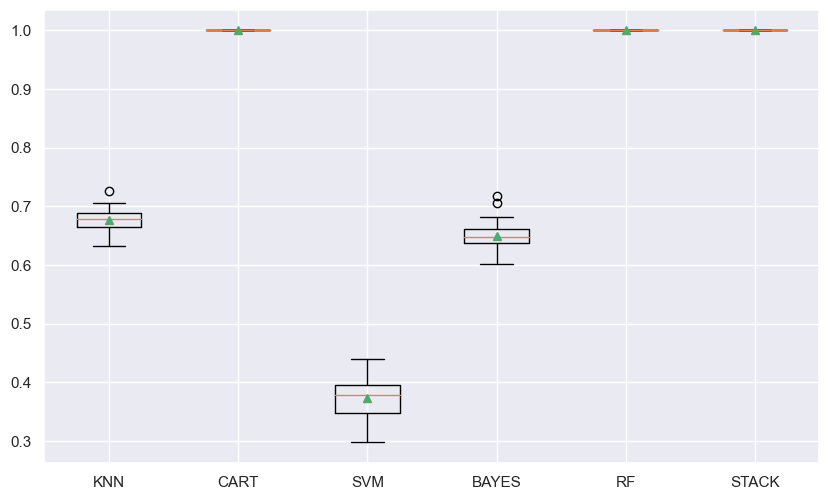

In [37]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [79]:
#COMPARISON OF PERFORMANCE USING ROC_AUC

>KNN 0.73251 (0.01819)
>CART 1.00000 (0.00000)
>SVM 0.53169 (0.02110)
>BAYES 0.79843 (0.01708)
>RF 1.00000 (0.00000)
>STACK 1.00000 (0.00000)


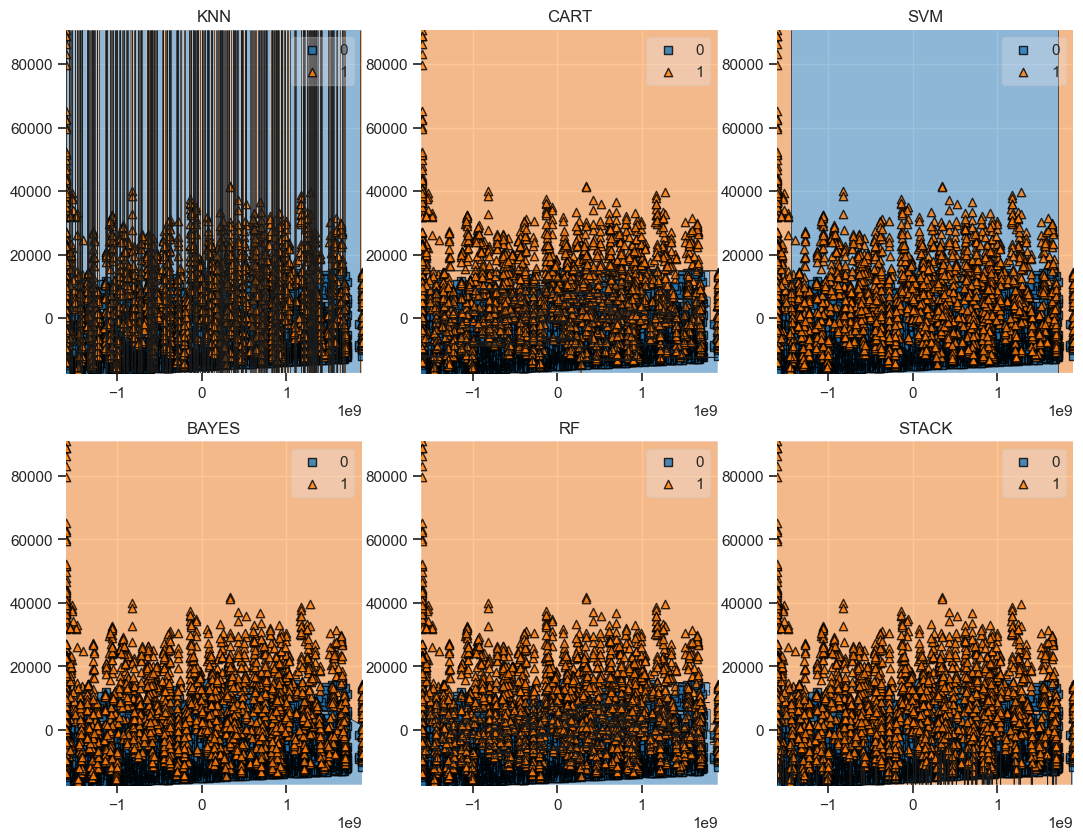

In [38]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
	return scores

knn = KNeighborsClassifier()
cart = DecisionTreeClassifier()
svm = SVC()
bayes = GaussianNB()
RF = RandomForestClassifier(random_state=1)
stacking = get_stacking()
c_list = [knn, cart, svm, bayes, RF, stacking]
label = ['KNN', 'CART', 'SVM', 'BAYES', 'RF', 'STACK']

fig = plt.figure(figsize=(13,10))
gs = gridspec.GridSpec(2,3)
grid = itertools.product([0,1], [0,1,2])
models = get_models()
# evaluate the models and store results
results, names = list(), list()
clf_mean, clf_std = list(), list()
pca = PCA(n_components = 2)
X1 = pca.fit_transform(X)
y1=y.to_numpy(copy=False)
s = 1
for model, name, grd in zip(c_list, label, grid):
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    clf_mean.append(mean(scores))
    clf_std.append(std(scores))
    print('>%s %.5f (%.5f)' % (name, mean(scores), std(scores)))
    
    model.fit(X1, y1)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig= plot_decision_regions(X=X1, y=y1, clf=model)
    plt.title(name)
    
plt.show()

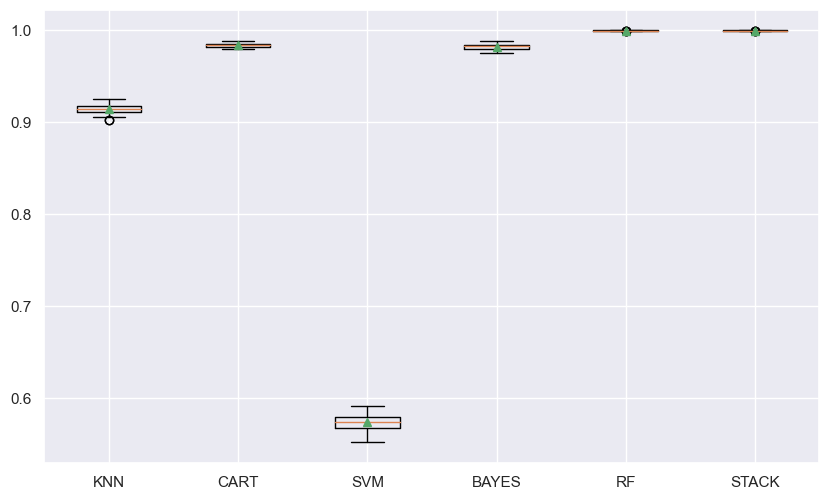

In [51]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show()